In [2358]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

warnings.filterwarnings('ignore')

In [2359]:

data_path = 'D51_test/'
data = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

train_Y = data['poi']
ids = df_test['name']
df_train = data.drop(['email_address'], axis=1)
df_test = df_test.drop(['email_address'], axis=1)
df = pd.concat([df_train,df_test])
df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


# 資料前處理階段

### 檢查空值
##### 根據PDF描述沒有的資料都是為不填 不需要額外補值 所以只要補0即可

In [2360]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


In [2361]:
for col in df.columns:
    df[col].fillna(0, inplace=True)

In [2362]:
#檢視相關係數
correlations = data.corr()['poi'].sort_values()

print('Most Positive Correlations:\n', correlations)

Most Positive Correlations:
 deferral_payments           -0.251548
deferred_income             -0.224654
from_messages               -0.126760
from_this_person_to_poi     -0.096864
to_messages                 -0.023047
shared_receipt_with_poi      0.120467
from_poi_to_this_person      0.127932
expenses                     0.136386
other                        0.225619
long_term_incentive          0.227805
bonus                        0.242170
restricted_stock             0.261102
total_payments               0.271335
salary                       0.371917
total_stock_value            0.443098
exercised_stock_options      0.591972
poi                          1.000000
loan_advances                1.000000
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64


In [2363]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,1.333474e+06,4.387965e+05,-3.827622e+05,1.942249e+04,4.182736e+06,7.074827e+04,358.602740,38.226027,24.287671,1.149658e+06,6.646839e+05,5.854318e+05,1.749257e+06,2.051637e+04,3.658114e+05,692.986301,1221.589041,4.350622e+06,5.846018e+06
std,8.094029e+06,2.741325e+06,2.378250e+06,1.190543e+05,2.607040e+07,4.327163e+05,1441.259868,73.901124,79.278206,9.649342e+06,4.046072e+06,3.682345e+06,1.089995e+07,1.439661e+06,2.203575e+06,1072.969492,2226.770637,2.693448e+07,3.624681e+07
min,0.000000e+00,-1.025000e+05,-2.799289e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.115000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,9.394475e+04,2.288695e+05
50%,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,6.082935e+05,2.018200e+04,16.500000,2.500000,0.000000,0.000000e+00,0.000000e+00,9.595000e+02,3.605280e+05,0.000000e+00,2.105960e+05,102.500000,289.000000,9.413595e+05,9.659550e+05
75%,8.000000e+05,9.684500e+03,0.000000e+00,0.000000e+00,1.714221e+06,5.374075e+04,51.250000,40.750000,13.750000,0.000000e+00,3.750648e+05,1.506065e+05,8.145280e+05,0.000000e+00,2.708505e+05,893.500000,1585.750000,1.968287e+06,2.319991e+06
max,9.734362e+07,3.208340e+07,0.000000e+00,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [2364]:
num_feature = []
for feature in df:
    if df[feature].dtype == 'float64' :
        num_feature.append(feature)

In [2365]:
### 檢查個欄位是否有離群值

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C0346EDC8>,
      dtype=object)

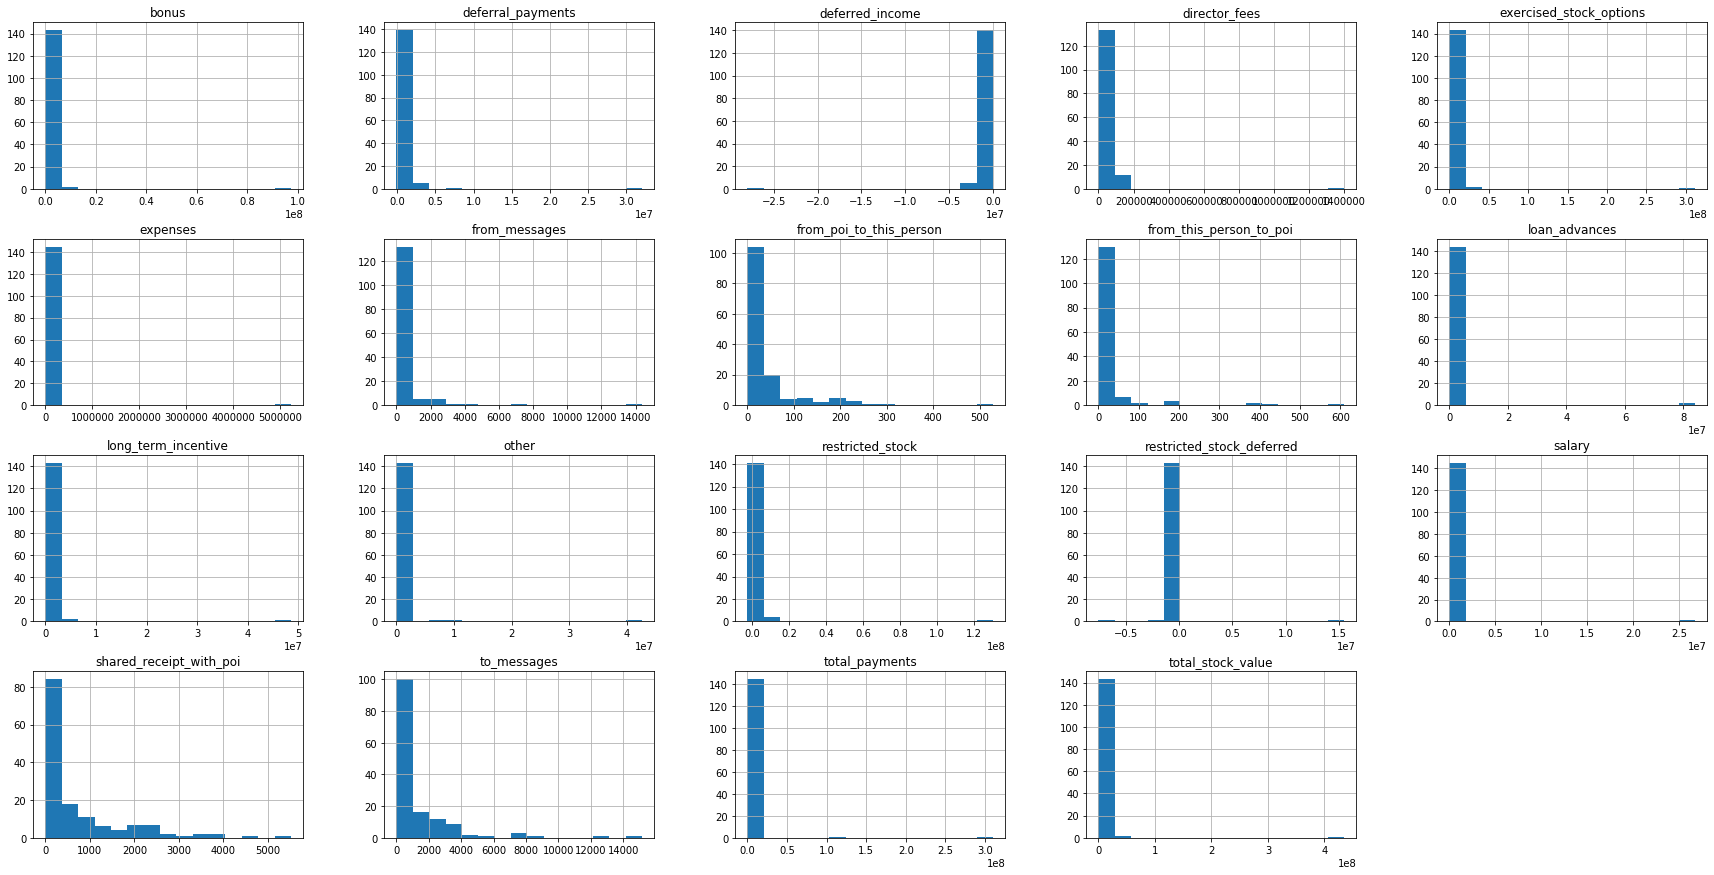

In [2366]:
df[num_feature].hist(bins = 15, figsize=(30,15), layout=(4,5))

### 異常資料排除

In [2367]:
#發現有一筆資料特別大
print(df["salary"].max()) 
print(df["salary"].sum() - df["salary"].max())

#可以發現最大那筆是所有資料的總計 名稱是TOAL
df.loc[df['name'] == 'TOTAL']

26704229.0
26704229.0


,name,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
20,TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,311764000.0,5235198.0,0.0,0.0,0.0,...,48521928.0,42667589.0,0,130322299.0,-7576788.0,26704229.0,0.0,0.0,309886585.0,434509511.0


In [2368]:
#另外有兩筆並非員工資料以及無紀錄資料
df.loc[(df['name'] == 'THE TRAVEL AGENCY IN THE PARK') | (df['name'] == 'LOCKHART EUGENE E')]

,name,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
65,THE TRAVEL AGENCY IN THE PARK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,362096.0,False,0.0,0.0,0.0,0.0,0.0,362096.0,0.0
107,LOCKHART EUGENE E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0         BELDEN TIMOTHY N
1       BOWEN JR RAYMOND M
2           HANNON KEVIN P
3         DELAINEY DAVID W
4         CAUSEY RICHARD A
5         HICKERSON GARY J
6           FREVERT MARK A
7              CHAN RONNIE
8     DONAHUE JR JEFFREY M
9        REYNOLDS LAWRENCE
10        HORTON STANLEY C
11           LEWIS RICHARD
12      SHERRICK JEFFREY B
13          MEYER JEROME J
14     DERRICK JR. JAMES V
15                PIRO JIM
16     DETMERING TIMOTHY J
17       KISHKILL JOSEPH G
18          BAY FRANKLIN R
19          PRENTICE JAMES
21          FALLON JAMES B
22              METTS MARK
23           WODRASKA JOHN
24     MORDAUNT KRISTINA M
25        CARTER REBECCA C
26        BHATNAGAR SANJAY
27        WALTERS GARETH W
28         BIBI PHILIPPE A
29         SHERRIFF JOHN R
30            GIBBS DANA R
31          LINDHOLM TOD A
32         MCMAHON JEFFREY
Name: name, dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C05516108>,
      dtype=object)

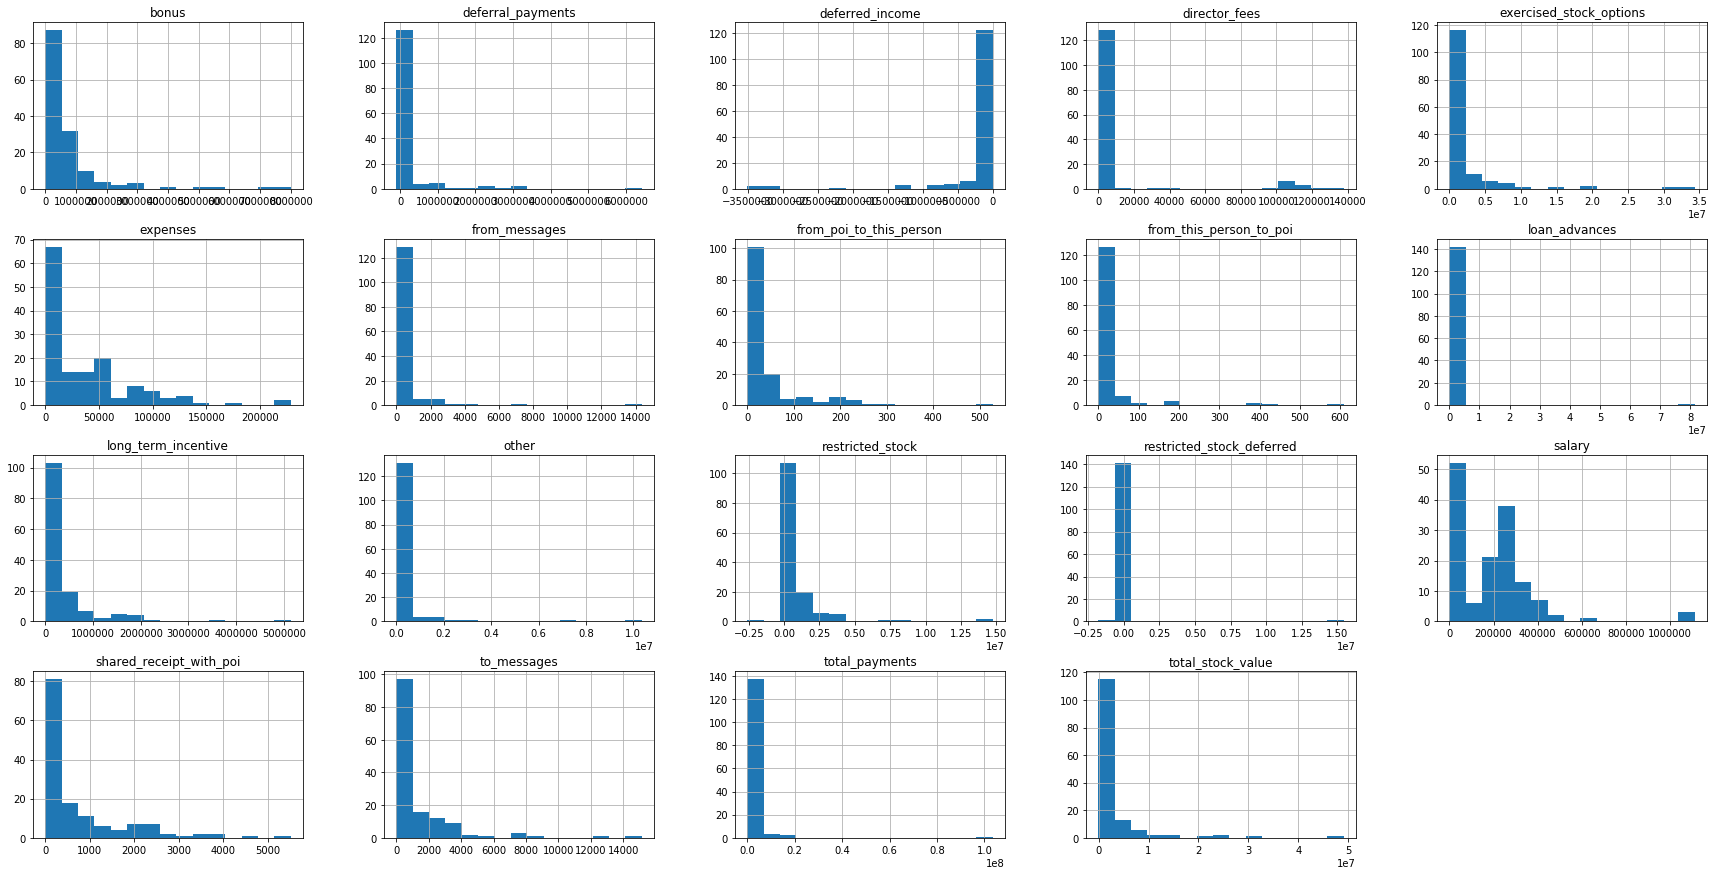

In [2369]:
#刪除該筆資料並重新切分資料
#total_row = df[df["name"] == 'TOTAL']
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]
test_X = test_X[test_X["name"] != 'TOTAL']
train_X = train_X[(train_X["name"] != 'THE TRAVEL AGENCY IN THE PARK') & (train_X['name'] != 'LOCKHART EUGENE E')]
train_Y = train_X['poi'].astype('bool')
df = pd.concat([train_X,test_X])
#因為被納入預測用資料 所以之後要補回
ids = df_test[df_test["name"] != 'TOTAL']['name']
print(ids)
# 重跑長條圖
df[num_feature].hist(bins = 15, figsize=(30,15), layout=(4,5))

In [2370]:
IQR = df.quantile(q=0.75) - df.quantile(q=0.25)
first_quartile = df.quantile(q=0.25)
third_quartile = df.quantile(q=0.75)
outliers = df[(df>(third_quartile + 1.5*IQR) ) | (df<(first_quartile - 1.5*IQR) )].count(axis=1)
outliers.sort_values(axis=0, ascending=False, inplace=True)
outliers.head(12)

8     13
6     12
0      9
33     8
58     8
1      7
87     7
68     7
47     7
59     6
26     6
14     6
dtype: int64

In [2371]:
#把超過7項的outlier都秀出來
df.iloc[[8,6,0,33,58,1,87],:]

,name,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
8,LAY KENNETH L,7000000.0,202911.0,-300000.0,0.0,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,True,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
6,YEAGER F SCOTT,0.0,0.0,0.0,0.0,8308552.0,53947.0,0.0,0.0,0.0,...,0.0,147950.0,True,3576206.0,0.0,158403.0,0.0,0.0,360300.0,11884758.0
0,RICE KENNETH D,1750000.0,0.0,-3504386.0,0.0,19794175.0,46950.0,18.0,42.0,4.0,...,1617011.0,174839.0,True,2748364.0,0.0,420636.0,864.0,905.0,505050.0,22542539.0
33,LAVORATO JOHN J,8000000.0,0.0,0.0,0.0,4158995.0,49537.0,2585.0,528.0,411.0,...,2035380.0,1552.0,False,1008149.0,0.0,339288.0,3962.0,7259.0,10425757.0,5167144.0
58,BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
1,SKILLING JEFFREY K,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
88,SULLIVAN-SHAKLOVITZ COLLEEN,100000.0,181993.0,0.0,0.0,1362375.0,0.0,0.0,0.0,0.0,...,554422.0,162.0,False,0.0,0.0,162779.0,0.0,0.0,999356.0,1362375.0


In [2372]:
#依據PDF給予的資訊決定是否要刪除這些資料 因為有幾項被標記成POI所以必定保留
df = df.drop([33,58])
train_Y = train_Y.drop([33,58])

#### 把不同性質的欄位分組

In [2373]:
#員工/股東的給付金額salary+bonus+long_term_incentive+deferred_income+deferral_payments+loan_advances+other+expenses+director_fees=total_payments
Payment_group=['salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances','other','expenses','director_fees']

total_payment_group=['total_payments']

all_Payment_group=['name','salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances','other','expenses','director_fees','total_payments']

#股利exercised_stock_options+restricted_stock+restricted_stock_deferred=total_stock_value
stock_group=['exercised_stock_options','restricted_stock','restricted_stock_deferred']

total_stock_group=['total_stock_value']

all_stock_group=['name','exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value']

In [2374]:
#驗證群組計算
print("payment sum:",data[Payment_group].iloc[0].sum())
print("totoal payment:",data[total_payment_group].iloc[0].sum())
print("stock sum:",data[stock_group].iloc[0].sum())
print("total stock:",data[total_stock_group].iloc[0].sum())

payment sum: 505050.0
totoal payment: 505050.0
stock sum: 22542539.0
total stock: 22542539.0


In [2375]:
#根據群組計算找出Payment_group !=total_payment_group 和stock_group !=total_stock_group 就可能是有遺漏值
payment_missing_value = []
for index, row in df.iterrows():
    if (row[Payment_group].sum() != row[total_payment_group].sum()):
        payment_missing_value.append(row)
payment_missing_df=pd.DataFrame(payment_missing_value)
payment_missing_df[all_Payment_group]

,name,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
50,BELFER ROBERT,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0
26,BHATNAGAR SANJAY,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0


In [2376]:
stock_missing_value = []
for index, row in df.iterrows():
    if (row[stock_group].sum() != row[total_stock_group].sum()):
        stock_missing_value.append(row)
stock_missing_df=pd.DataFrame(stock_missing_value)
stock_missing_df[all_stock_group]

,name,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
50,BELFER ROBERT,3285.0,0.0,44093.0,-44093.0
26,BHATNAGAR SANJAY,2604490.0,-2604490.0,15456290.0,0.0


##### 根據安隆的PDF的描述 BELFER ROBERT和BHATNAGAR SANJAY資料有誤填因此做校對處理

In [2377]:
df.iloc[50]['deferred_income'] = -102500
df.iloc[50]['deferral_payments'] = 0
df.iloc[50]['expenses'] = 3285
df.iloc[50]['director_fees'] = 102500
df.iloc[50]['total_payments'] = 3285
df.iloc[50]['exercised_stock_options'] = 0
df.iloc[50]['restricted_stock'] = 44093
df.iloc[50]['restricted_stock_deferred'] = -44093
df.iloc[50]['total_stock_value'] = 0

df.iloc[26]['total_payments'] =137864
df.iloc[26]['expenses'] =137864
df.iloc[26]['other'] = 0
df.iloc[26]['director_fees'] = 0
df.iloc[26]['exercised_stock_options'] = 15456290
df.iloc[26]['restricted_stock'] = 2604490
df.iloc[26]['restricted_stock_deferred'] = -2604490
df.iloc[26]['total_stock_value'] = 15456290

df = df.drop(['name'], axis=1)

### 特徵組合

#### email的to_messages和from_poi_to_this_person以及from_messages和from_this_person_to_poi
#### 可以計算與poi互動的比例 比例越高者被判為poi的機率應該越高

In [2378]:
#email次數(email_address排除)
to_email_group=['to_messages', 'from_poi_to_this_person','msg_from_poi_ratio']

form_email_group=['from_messages', 'from_this_person_to_poi','msg_to_poi_ratio']

all_email_group=['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi','msg_from_poi_ratio','msg_to_poi_ratio']

In [2379]:
df['msg_from_poi_ratio'] = (df['from_poi_to_this_person'] / df['to_messages'])
df['msg_to_poi_ratio'] = (df['from_this_person_to_poi'] / df['from_messages'])
df['msg_from_poi_ratio'].fillna(0, inplace=True)
df['msg_to_poi_ratio'].fillna(0, inplace=True)
df[all_email_group]

,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,msg_from_poi_ratio,msg_to_poi_ratio
0,905.0,42.0,18.0,4.0,864.0,0.046409,0.222222
1,3627.0,88.0,108.0,30.0,2042.0,0.024262,0.277778
2,225.0,13.0,39.0,14.0,91.0,0.057778,0.358974
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,2598.0,199.0,144.0,25.0,2188.0,0.076597,0.173611
...,...,...,...,...,...,...,...
28,1607.0,23.0,40.0,8.0,1336.0,0.014312,0.200000
29,3187.0,28.0,92.0,23.0,2103.0,0.008786,0.250000
30,169.0,0.0,12.0,0.0,23.0,0.000000,0.000000
31,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


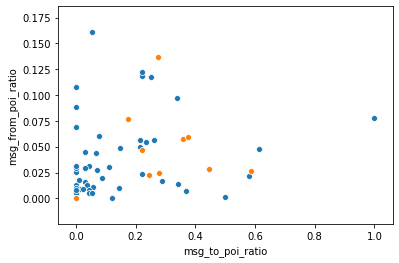

In [2380]:
#繪製散佈圖 可以發現poi的資料點比較靠右
import seaborn as sns
import matplotlib.pyplot as plt
train_num = train_Y.shape[0]

train_X = df[:train_num]
test_X = df[train_num:]
not_poi = train_X.loc[train_X['poi'] == False]
is_poi = train_X.loc[train_X['poi'] == True]
sns.scatterplot(x = not_poi['msg_to_poi_ratio'], y=not_poi['msg_from_poi_ratio'])
sns.scatterplot(x = is_poi['msg_to_poi_ratio'], y=is_poi['msg_from_poi_ratio'])
plt.show()

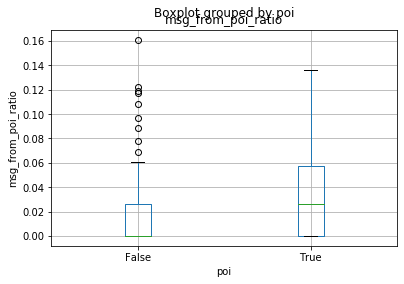

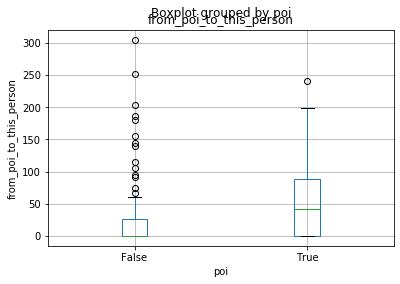

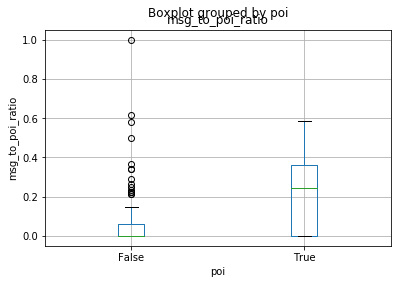

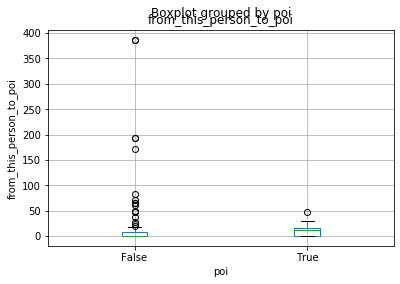

In [2381]:
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

#檢驗與poi的關係
df_temp = train_X[['poi', 'msg_from_poi_ratio']]
df_temp.boxplot(by = 'poi')
plt.ylabel('msg_from_poi_ratio')
plt.xlabel('poi')
plt.show()

df_temp = train_X[['poi', 'from_poi_to_this_person']]
df_temp.boxplot(by = 'poi')
plt.ylabel('from_poi_to_this_person')
plt.xlabel('poi')
plt.show()


df_temp = train_X[['poi', 'msg_to_poi_ratio']]
df_temp.boxplot(by = 'poi')
plt.ylabel('msg_to_poi_ratio')
plt.xlabel('poi')
plt.show()


df_temp = train_X[['poi', 'from_this_person_to_poi']]
df_temp.boxplot(by = 'poi')
plt.ylabel('from_this_person_to_poi')
plt.xlabel('poi')
plt.show()

In [2382]:
#因為已經取radio可以拿掉to_messages跟from_messages
df = df.drop(['to_messages','from_messages','total_payments','total_stock_value'], axis=1)

In [2383]:
#拿掉poi
df = df.drop(['poi'], axis=1)
df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,msg_from_poi_ratio,msg_to_poi_ratio
0,1750000.0,0.0,-3504386.0,0.0,19794175.0,46950.0,42.0,4.0,0.0,1617011.0,174839.0,2748364.0,0.0,420636.0,864.0,0.046409,0.222222
1,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,88.0,30.0,0.0,1920000.0,22122.0,6843672.0,0.0,1111258.0,2042.0,0.024262,0.277778
2,200000.0,0.0,-4167.0,0.0,1624396.0,22884.0,13.0,14.0,0.0,0.0,1573324.0,869220.0,0.0,211844.0,91.0,0.057778,0.358974
3,800000.0,0.0,0.0,0.0,0.0,118134.0,0.0,0.0,0.0,602671.0,907502.0,985032.0,0.0,224305.0,0.0,0.000000,0.000000
4,1250000.0,0.0,-262500.0,0.0,0.0,35818.0,199.0,25.0,0.0,375304.0,486.0,126027.0,0.0,240189.0,2188.0,0.076597,0.173611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1000000.0,0.0,0.0,0.0,1465734.0,38559.0,23.0,8.0,0.0,369721.0,425688.0,378082.0,0.0,213625.0,1336.0,0.014312,0.200000
29,1500000.0,0.0,0.0,0.0,1835558.0,0.0,28.0,23.0,0.0,554422.0,1852186.0,1293424.0,0.0,428780.0,2103.0,0.008786,0.250000
30,0.0,504610.0,0.0,0.0,2218275.0,0.0,0.0,0.0,0.0,461912.0,0.0,0.0,0.0,0.0,23.0,0.000000,0.000000
31,200000.0,204075.0,0.0,0.0,2549361.0,57727.0,0.0,0.0,0.0,175000.0,2630.0,514847.0,0.0,236457.0,0.0,0.000000,0.000000


In [2384]:
### 特徵選擇

In [2385]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import train_test_split
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.25, random_state=44)

kbest = SelectKBest()
X_new = kbest.fit_transform(train_X, train_Y)

kbest_df = pd.DataFrame(data = list(zip(df[1:], kbest.scores_)), columns=['Feature', 'Score'])
kbest_df

,Feature,Score
0,bonus,17.898118
1,deferral_payments,0.791022
2,deferred_income,6.279280
3,director_fees,1.630144
4,exercised_stock_options,31.548463
5,expenses,7.246840
6,from_poi_to_this_person,3.889132
7,from_this_person_to_poi,0.202967
8,loan_advances,7.842576
9,long_term_incentive,6.401148


In [2386]:
#選出分數>6的欄位出來

feature=kbest_df[kbest_df['Score']>6]['Feature']

df = df[feature]
df

,bonus,deferred_income,exercised_stock_options,expenses,loan_advances,long_term_incentive,other,restricted_stock,salary,msg_to_poi_ratio
0,1750000.0,-3504386.0,19794175.0,46950.0,0.0,1617011.0,174839.0,2748364.0,420636.0,0.222222
1,5600000.0,0.0,19250000.0,29336.0,0.0,1920000.0,22122.0,6843672.0,1111258.0,0.277778
2,200000.0,-4167.0,1624396.0,22884.0,0.0,0.0,1573324.0,869220.0,211844.0,0.358974
3,800000.0,0.0,0.0,118134.0,0.0,602671.0,907502.0,985032.0,224305.0,0.000000
4,1250000.0,-262500.0,0.0,35818.0,0.0,375304.0,486.0,126027.0,240189.0,0.173611
...,...,...,...,...,...,...,...,...,...,...
28,1000000.0,0.0,1465734.0,38559.0,0.0,369721.0,425688.0,378082.0,213625.0,0.200000
29,1500000.0,0.0,1835558.0,0.0,0.0,554422.0,1852186.0,1293424.0,428780.0,0.250000
30,0.0,0.0,2218275.0,0.0,0.0,461912.0,0.0,0.0,0.0,0.000000
31,200000.0,0.0,2549361.0,57727.0,0.0,175000.0,2630.0,514847.0,236457.0,0.000000


In [2387]:
#標準化
from sklearn.preprocessing import MinMaxScaler
df = MinMaxScaler().fit_transform(df)

In [2388]:
from sklearn.model_selection import train_test_split
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.25, random_state=44)

### 建立模型

In [2389]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score, classification_report,recall_score,precision_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  
from scipy.stats import truncnorm
import random

In [2390]:
#超參數調校
lr = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gdbc = GradientBoostingClassifier()

#參數組合
lr_params = {} 
lr_params["C"] =  [0.01,0.05, 0.1,1,10]
lr_params["penalty"] = ["l2"]

knn_params = {}
knn_params["n_neighbors"] = [2,3,4,5,6,7,8,9,10]
knn_params["weights"] = ['uniform', 'distance']

tree_params = {}
tree_params["min_samples_split"] = [1,2,3,4,5,6,7]
tree_params["max_depth"] = [None, 1,2,3, 4,5,6, 7]
tree_params["max_features"] = [None, 'auto', 'log2']
tree_params["criterion"] = ["gini", "entropy"]

rf_params = {}
rf_params["n_estimators"] =  [10,20,50,100,150,200,300,400]
rf_params["max_depth"] = [None,3,4,5,6,7,8,9,10]
rf_params["min_samples_split"] = [1,2, 3, 4, 5,6,7,8,9,10]
rf_params["min_samples_leaf"] = [1, 2, 3, 4,5,6,7,8,9,10,15,20]

gdbc_params = {}
gdbc_params["learning_rate"] = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2,0.5,1]
gdbc_params["subsample"] = [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]
gdbc_params["n_estimators"] = [10,20,50,100,150,200,300,400]
gdbc_params["max_depth"] = [None,3,4,5,6,7]
gdbc_params["min_samples_split"] = [1,2, 3, 4, 5,10]
gdbc_params["min_samples_leaf"] = [1, 2, 3, 4,5]



In [2391]:
#參數搜尋
def randomSearchCV_best_params(model, params, train_X, train_Y) :
    rand_result = RandomizedSearchCV(model, params,cv=5,n_iter=400,n_jobs=-1, verbose=1, scoring="accuracy")
    rand_result.fit(train_X, train_Y)
    # Results from Random Search
    print("\n========================================================")
    print(" Results from Random Search " )
    print("========================================================")    
    print("\n The best estimator across ALL searched params:\n",rand_result.best_estimator_) 
    print("\n The best score across ALL searched params:\n",rand_result.best_score_)
    print("\n The best parameters across ALL searched params:\n",rand_result.best_params_)
    return rand_result


In [2392]:
# LogisticRegression
lr = randomSearchCV_best_params(lr, lr_params, x_train, y_train)

y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:,1]
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: {}".format(acc))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: {}".format(auc))
    
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': lr_pred})
#因為有一筆total資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub=sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_lr_pred.csv', index=False)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 The best score across ALL searched params:
 0.9257352941176471

 The best parameters across ALL searched params:
 {'penalty': 'l2', 'C': 10}
Accuracy score: 0.8571428571428571
F1 score: 0.0
AUC: 0.7499999999999999


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [2393]:
# KNeighborsClassifier
knn = randomSearchCV_best_params(knn, knn_params, x_train, y_train)
'''
knn =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
'''
#knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:,1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))

knn_pred = knn.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': knn_pred})
#因為有一筆total資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub=sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_knn_pred.csv', index=False)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



 Results from Random Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

 The best score across ALL searched params:
 0.9014705882352942

 The best parameters across ALL searched params:
 {'weights': 'uniform', 'n_neighbors': 4}
Accuracy score: 0.8571428571428571
F1 score: 0.0
AUC: 0.7499999999999999


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished


In [2394]:
# DecisionTreeClassifier 比現比較差 可以排除
tree = randomSearchCV_best_params(tree, tree_params, x_train, y_train)

y_pred = tree.predict(x_test)
y_pred_proba = tree.predict_proba(x_test)[:,1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))

tree_pred = tree.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': tree_pred})
#因為有一筆total資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub = sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_tree_pred.csv', index=False)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s




 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 The best score across ALL searched params:
 0.95

 The best parameters across ALL searched params:
 {'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}
Accuracy score: 0.8214285714285714
F1 score: 0.0
AUC: 0.4791666666666667


[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:    0.9s finished


In [2395]:
# RandomForestClassifier
rf = randomSearchCV_best_params(rf, rf_params, x_train, y_train)

y_pred = rf.predict(x_test)
y_pred_proba = rf.predict_proba(x_test)[:,1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))

rf_pred = rf.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': rf_pred})
#因為有一筆total資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub = sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_rf_pred.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.9min finished



 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9382352941176471

 The best parameters across ALL searched params:
 {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 4}
Accuracy score: 0.8214285714285714
F1 score: 0.0
AUC: 0.71875


In [ ]:
# GradientBoostingClassifier

gdbc = randomSearchCV_best_params(gdbc, gdbc_params, x_train, y_train)

y_pred = gdbc.predict(x_test)
y_pred_proba = gdbc.predict_proba(x_test)[:,1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))

gdbc_pred = gdbc.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': gdbc_pred})
#因為有一筆total資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub = sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_gdbc_pred.csv', index=False)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   11.8s


In [ ]:
# StackingClassifier tree可以考慮不加入
meta_estimator = lr
stacking = StackingClassifier(classifiers=[lr,knn,rf,gdbc], meta_classifier=meta_estimator, use_probas=True, average_probas=False)
stacking.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_proba = stacking.predict_proba(x_test)[:, 1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))

stacking_pred = stacking.predict_proba(test_X)[:,1]

sub = pd.DataFrame({'name': ids, 'poi': stacking_pred})
#因為有一筆total資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub = sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_stacking_pred.csv', index=False)

In [ ]:
from IPython.display import Image
Image("2020_ML100Marathon_Midtern.png")